<a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>teste</a>

# Importação das bibliotecas necessárias

In [23]:
from dependecies import install_dependecies
install_dependecies()


from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from  utils import Dataset

Installing scikit-learn...
tensorflow is already installed.
matplotlib is already installed.
numpy is already installed.


# Classes do dataset CIFAR-10 (em português)

In [2]:
CLASSES = ['avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

# Carregamento e preprocessamento dos dados do CIFAR-10

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
train = Dataset(x_train, y_train)
test = Dataset(x_test, y_test)

# Exibe os formatos dos dados para validação
print(f"Formato do conjunto de treinamento: {train.x.shape}, {train.y.shape}")
print(f"Formato do conjunto de teste: {test.x.shape}, {test.y.shape}")

Formato do conjunto de treinamento: (50000, 32, 32, 3), (50000, 1)
Formato do conjunto de teste: (10000, 32, 32, 3), (10000, 1)


# Normalização dos dados para o intervalo [0, 1]

In [4]:
train.x = train.x.astype('float32') / 255.0
test.x = test.x.astype('float32') / 255.0

# Definição do modelo de rede neural convolucional (CNN)

In [5]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\nicolas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compila o modelo definindo o otimizador, a função de perda e a métrica de avaliação

In [6]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Configura os callbacks para monitorar o treinamento

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Treina o modelo utilizando os callbacks

In [8]:
history = cnn.fit(
    train.x, train.y,
    validation_data=(test.x, test.y),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3835 - loss: 1.6887 - val_accuracy: 0.5779 - val_loss: 1.1854
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5958 - loss: 1.1352 - val_accuracy: 0.6382 - val_loss: 1.0281
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6579 - loss: 0.9825 - val_accuracy: 0.6619 - val_loss: 0.9672
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6847 - loss: 0.9045 - val_accuracy: 0.6669 - val_loss: 0.9600
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7068 - loss: 0.8358 - val_accuracy: 0.6787 - val_loss: 0.9347
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7284 - loss: 0.7863 - val_accuracy: 0.6892 - val_loss: 0.9068
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7486 - loss: 0.7286 - val_accuracy: 0.6999 - val_loss: 0.8989
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7642 - loss: 0.6835

# Avaliação do modelo no conjunto de teste

In [9]:
test_loss, test_acc = cnn.evaluate(test.x, test.y)
print(f"Acurácia no conjunto de teste: {test_acc}, Perda no conjunto de teste: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7084 - loss: 0.8799
Acurácia no conjunto de teste: 0.7016000151634216, Perda no conjunto de teste: 0.898457407951355


# Visualiza os resultados do treinamento
## Gráfico da perda ao longo das epochs

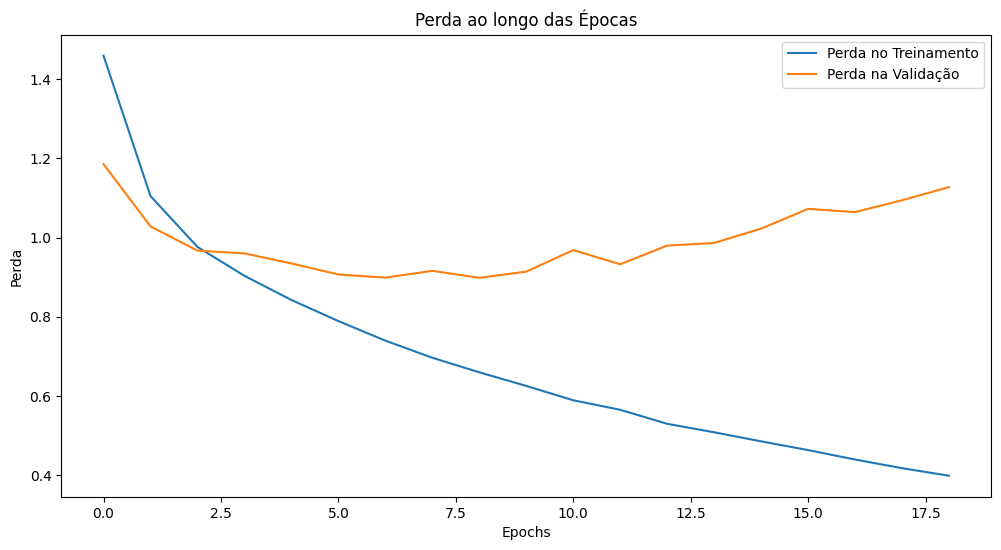

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Perda ao longo das Épocas')
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Gráfico da acurácia ao longo das epochs

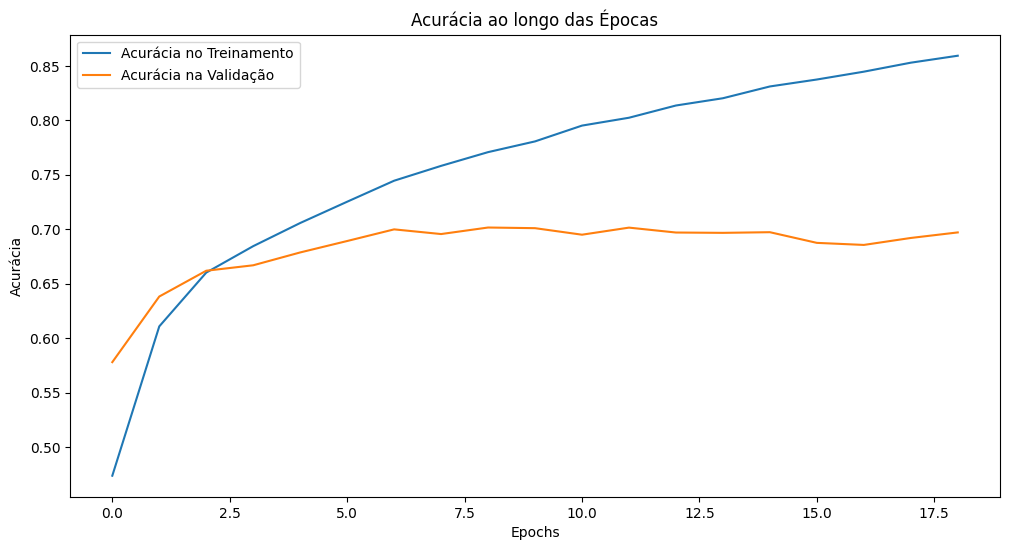

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.title('Acurácia ao longo das Épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Previsões no conjunto de teste

In [12]:
predictions = cnn.predict(test.x)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Visualiza algumas previsões com comparação entre os rótulos reais e previstos

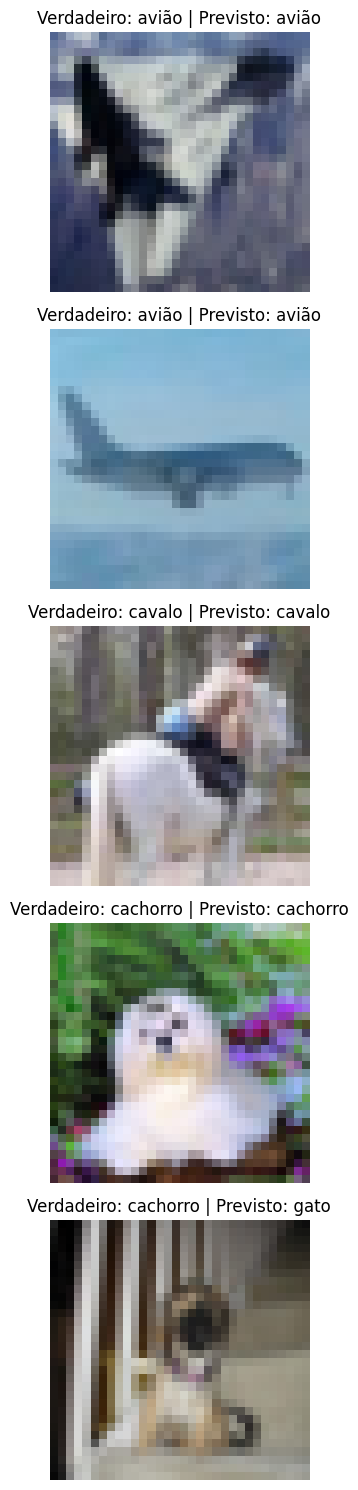

In [13]:
num_images = 5
random_indices = np.random.choice(len(test.x), num_images, replace=False)
plt.figure(figsize=(5, 15))

for i, idx in enumerate(random_indices):
    plt.subplot(num_images, 1, i + 1)
    plt.imshow(test.x[idx])
    plt.axis('off')
    true_label = CLASSES[test.y[idx][0]]
    predicted_label = CLASSES[predicted_classes[idx]]
    plt.title(f"Verdadeiro: {true_label} | Previsto: {predicted_label}", fontsize=12)

plt.tight_layout()
plt.show()

# Gera matriz de confusão e exibe com Matplotlib

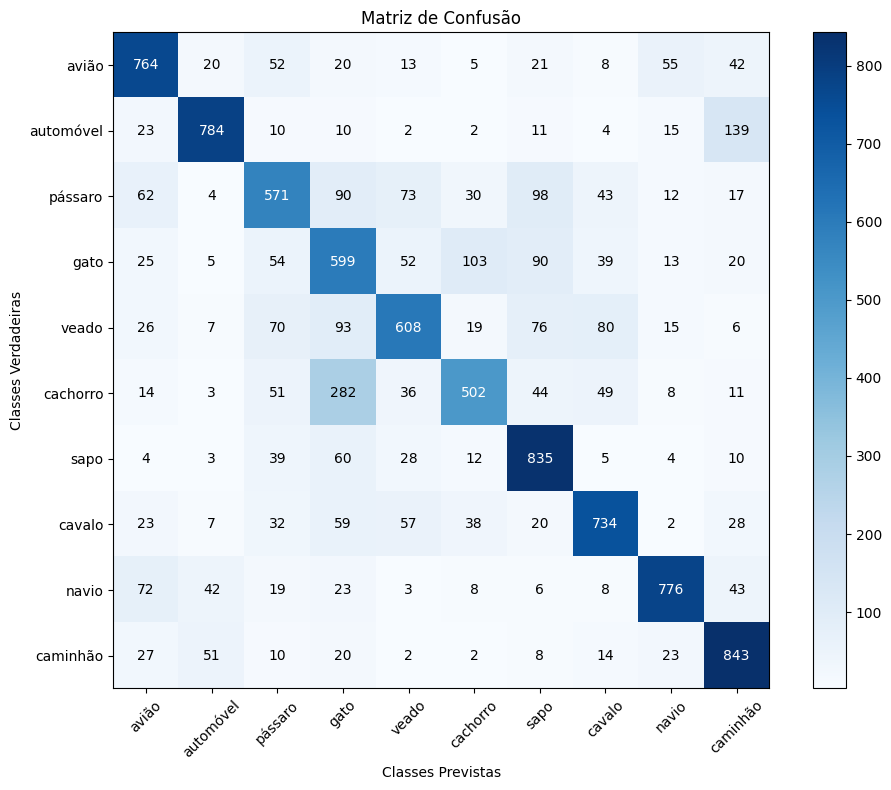

In [19]:
conf_matrix = confusion_matrix(test.y, predicted_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(CLASSES))
plt.xticks(tick_marks, CLASSES, rotation=45)
plt.yticks(tick_marks, CLASSES)
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Verdadeiras')
# Adicionar valores à matriz de confusão
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha='center', va='center',
                 color='white' if conf_matrix[i, j] > conf_matrix.max() / 2. else 'black')

plt.tight_layout()
plt.show()

# Relatório detalhado de classificação

In [20]:
report = classification_report(test.y, predicted_classes, target_names=CLASSES)
print(report)

              precision    recall  f1-score   support

       avião       0.73      0.76      0.75      1000
   automóvel       0.85      0.78      0.81      1000
     pássaro       0.63      0.57      0.60      1000
        gato       0.48      0.60      0.53      1000
       veado       0.70      0.61      0.65      1000
    cachorro       0.70      0.50      0.58      1000
        sapo       0.69      0.83      0.76      1000
      cavalo       0.75      0.73      0.74      1000
       navio       0.84      0.78      0.81      1000
    caminhão       0.73      0.84      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



# Identificar os piores casos (classes mais confundidas)

In [21]:
worse_cases = np.unravel_index(np.argmax(conf_matrix - np.eye(len(CLASSES)) * conf_matrix.max()), conf_matrix.shape)
print(f"Classes mais confundidas: Verdadeira - {CLASSES[worse_cases[0]]}, Prevista - {CLASSES[worse_cases[1]]}")

Classes mais confundidas: Verdadeira - cachorro, Prevista - gato
